<a href="https://colab.research.google.com/github/NereaDJ/AR/blob/main/src/05_DIY_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

indicator_file_path = "data/indicators.csv"

if not os.path.isfile(indicator_file_path):
  print('Indicator dataset not found, extracting indicators...')
  !python src/00_Environment_Checks.py
  !python src/01_Indicator_extraction.py
  print('Indicators extracted succesfully!')

# Now Is Your Time...

With everything we've covered in these two sessions, it's now your time to demonstrate what you've learned.

What I need you to do is build a model, from feature extraction (which I've already completed for you) to model validation.

You can either complete the Remaining Useful Life (RUL) exercise that we did in our last session, or you could create a new exercise by manipulating the indicators. This could be to create an anomaly detection, a clustering problem, or a diagnostic model.

**The choice is yours**


# Evaluation

The following list of checkmarks will be used to evaluate the work, note some are optinoal while others are **compulsory**.

The following checks are a must:

- [x] From a fresh restart, the notebook compiles correclty
- [x] Use a validation partitioning schema
- [x] Train a model
- [x] Validate the model

The following checks will improve your marks and your understanding:

- [X] Built a new problem dataset (anomaly, diagnosis, clustering)
- [x] Checked the existence of missing values in the dataset / Eliminated outliers
- [x] New exploratory visualization has been created
- [x] Improved validation schemas have been used
- [X] Feature engineering techniques are used
- [ ] New modelling algorithms are employed
- [ ] Deployment: A function that, given a file path reads, extracts indicators, runs model and returns a label.

Good luck and don't hesitate to ask any questions you might have during the development.

In [2]:
import pandas as pd
indicators = pd.read_csv('data/indicators.csv', sep = '\t')

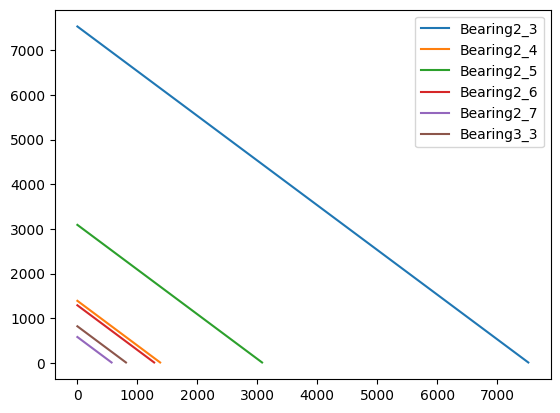

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

indicators = indicators[indicators.Alive == True].copy()

groups = indicators.groupby('Bearing')

for name, group in groups:
    plt.plot(group['Duration'],group['RUL'], label=name)

plt.legend()
plt.show()


In [4]:
indicators.columns

Index(['Origin', 'Bearing', 'OperatingCondition', 'TestNumber', 'TestIdx',
       'Hour', 'Minute', 'Second', 'Mili/centisecond', 'Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms', 'Timestamp', 'Duration', 'Actual_RUL', 'RUL',
       'Alive'],
      dtype='object')

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split

actual_indicators = ['Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

target_variable = ['RUL']

In [6]:
# Select the indicators for the training, select target variable

X = indicators[actual_indicators]
y = indicators[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# Create a train test partitioning

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (984, 23)
y_train shape: (984, 1)
X_test shape: (486, 23)
y_test shape: (486, 1)


In [8]:
# Import the model
from sklearn.linear_model import LinearRegression

# Fit the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# check the score
print(model.score(X_test, y_test))

0.5031007047694621


R-squared: 0.5031007047694621


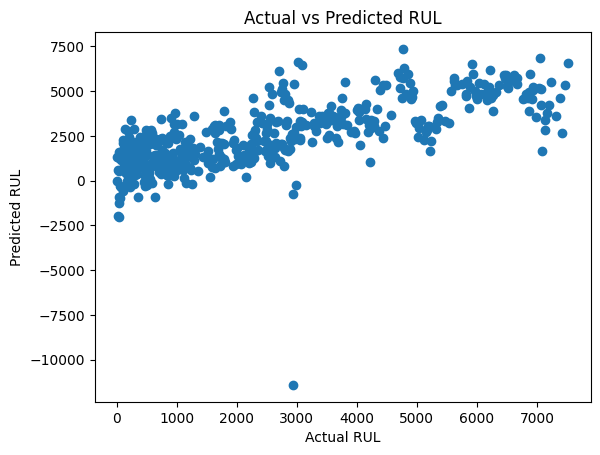

In [10]:
# Use the model to predict in the test set
y_pred = model.predict(X_test)

# Compare the predictions against the actual values: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#Calculate R-squared
r2=r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

#Plot the predicted vs actual values
plt.scatter(y_test, y_pred)

plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")

plt.show()

#Checked the existence of missing values in the dataset / Eliminated outliers

Checked the existence of missing values in the dataset / Eliminated outliers

    Check for missing values
    print(indicators.isnull().sum())

Handle missing values (example: fill with mean)
    
    for col in actual_indicators:
      if indicators[col].isnull().any():
        indicators[col].fillna(indicators[col].mean(), inplace=True)

Identify outliers (example: using IQR)
    
    Q1 = indicators[actual_indicators].quantile(0.25)
    Q3 = indicators[actual_indicators].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ~((indicators[actual_indicators] < (Q1 - 1.5 * IQR)) | (indicators[actual_indicators] > (Q3 + 1.5 * IQR))).any(axis=1)
    print(indicators.shape)
Remove outliers
    
    indicators = indicators[outliers]
    print(indicators.shape)
Re-split the data after handling outliers
    
    X = indicators[actual_indicators]
    y = indicators[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [11]:
#Con el metodo de Z-Score
import numpy as np
from scipy import stats

# Calcular el Z-Score para cada punto de datos
z = np.abs(stats.zscore(indicators[actual_indicators]))

# Definir un umbral para identificar outliers (por ejemplo, 3 desviaciones estándar)
threshold = 3

# Crear una máscara booleana para identificar outliers
outliers = np.where(z > threshold)
print(indicators.shape)

# Eliminar outliers del DataFrame
indicators_cleaned = indicators[(z < threshold).all(axis=1)]
print(indicators_cleaned.shape)

# Re-split the data after handling outliers
X = indicators_cleaned[actual_indicators]
y = indicators_cleaned[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(1470, 37)
(1308, 37)


#New exploratory visualization has been created

Asi calculamos la matriz de correlación entre los indicadores para saber como se comportan unos frente a otros.

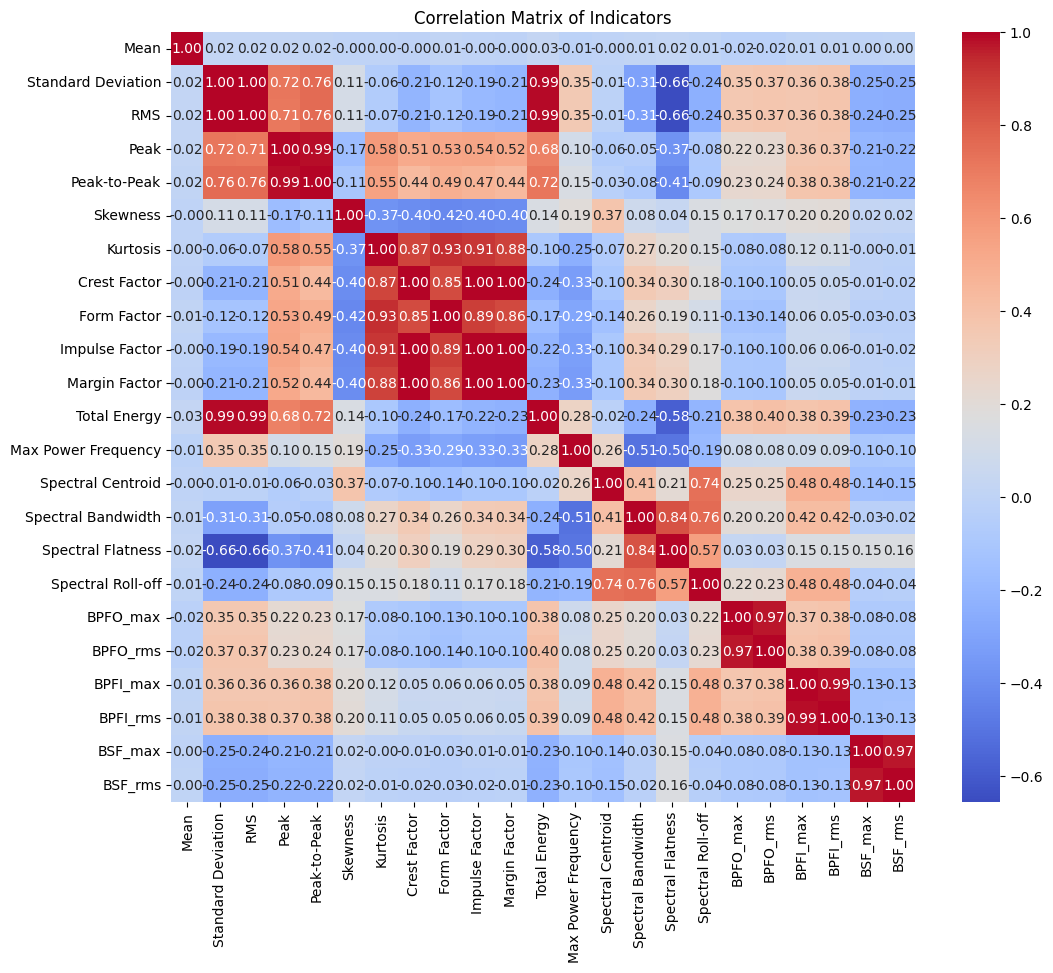

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = indicators_cleaned[actual_indicators].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Indicators')
plt.show()


Añadimos tambien en la grafica el indicador "RUL" para analizar que variables tiene mas o menos relación con el indicados de vida util de la herramienta.

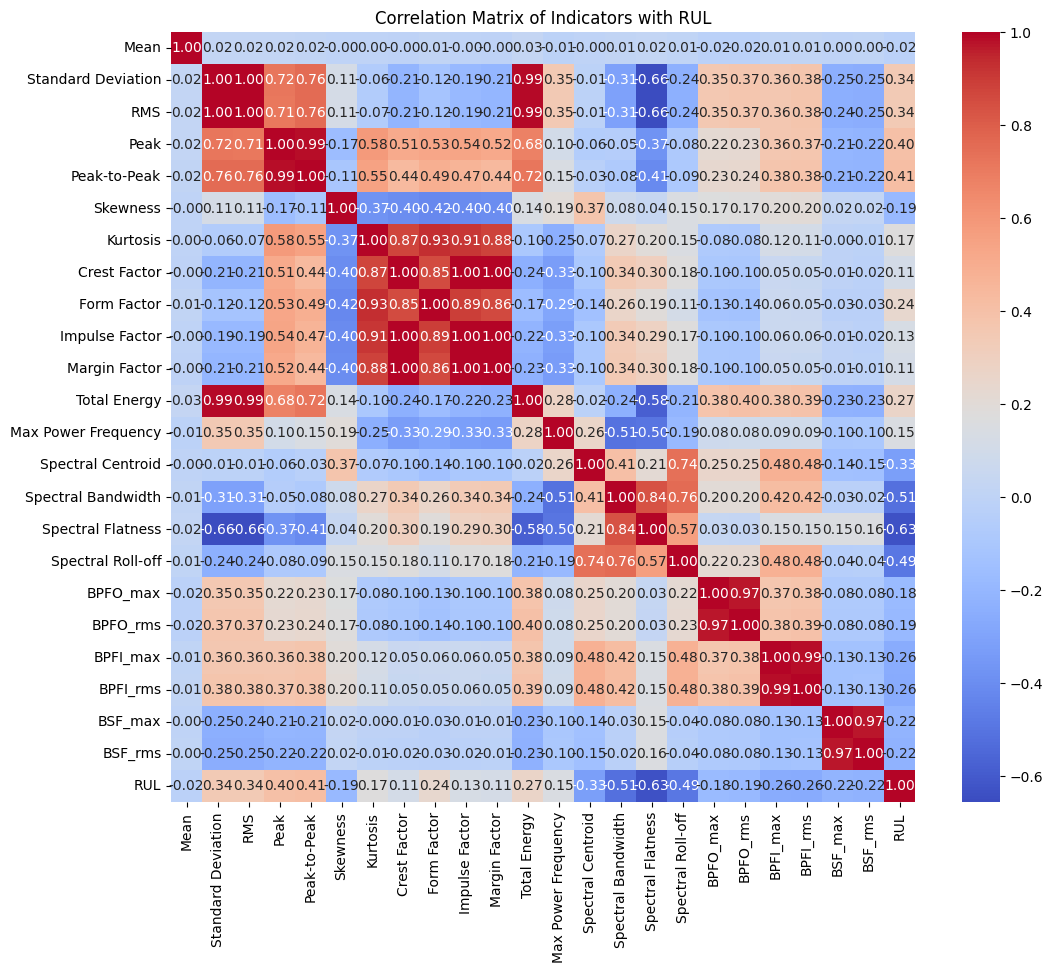

In [13]:
# matriz de correlacióon añadiendo la variable RUL

import pandas as pd
import matplotlib.pyplot as plt
# Concatenate the features and target variable for correlation analysis
indicators_with_rul = pd.concat([X, y], axis=1)

# Calculate the correlation matrix including RUL
correlation_matrix_with_rul = indicators_with_rul.corr()

# Create a heatmap of the correlation matrix with RUL
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_with_rul, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Indicators with RUL')
plt.show()



# Improved validation schemas have been used

Comprobamos que el nuevo modelo es mejor frente al modelo de inicio.

0.6601633591599163
R-squared: 0.6601633591599163


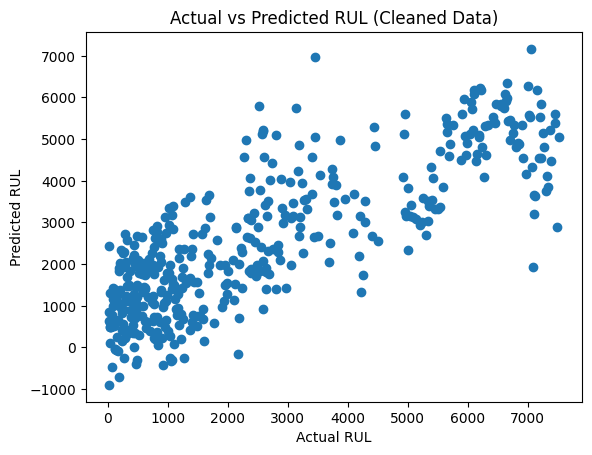

In [14]:
import matplotlib.pyplot as plt
# Fit the model with cleaned data
model = LinearRegression()
model.fit(X_train, y_train)

# check the score with cleaned data
print(model.score(X_test, y_test))

# Use the model to predict in the test set with cleaned data
y_pred = model.predict(X_test)

# Compare the predictions against the actual values: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

#Calculate R-squared with cleaned data
r2=r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

#Plot the predicted vs actual values with cleaned data
plt.scatter(y_test, y_pred)

plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL (Cleaned Data)")

plt.show()


In [15]:
# Calculate the mean of the RUL
mean_rul = indicators_cleaned['RUL'].mean()
print(f"Mean RUL: {mean_rul}")



Mean RUL: 2400.336391437309


In [16]:
print(len(indicators))
print(len(indicators_cleaned))


1470
1308


In [17]:
# prompt: crea una nueva variable Y_pred_baseline en la que repetimos el valor medio de RUL tanto como observaciones tiene el modelo

# Create the baseline prediction by repeating the mean RUL value
Y_pred_baseline = [mean_rul] * len(y_pred)


In [18]:
# R squared

r2 = r2_score(y_pred, Y_pred_baseline)
print(f"R-squared (from code): {r2}")


R-squared (from code): -0.008356862772767704


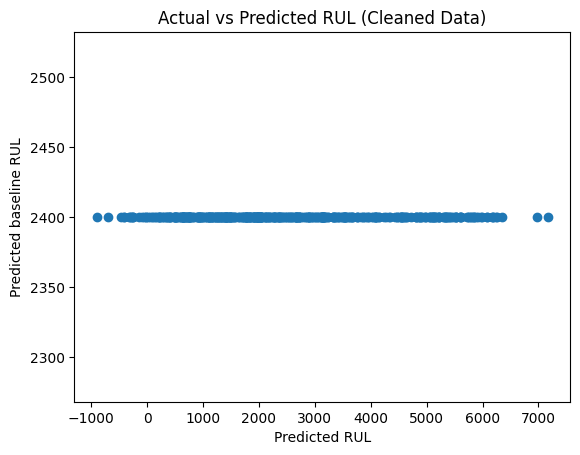

In [19]:
plt.scatter(y_pred, Y_pred_baseline)

plt.xlabel("Predicted RUL")
plt.ylabel("Predicted baseline RUL")
plt.title("Actual vs Predicted RUL (Cleaned Data)")

plt.show()

In [20]:
# MAE (Mean Absolut Error)

from sklearn.metrics import mean_absolute_error

# Assuming y_test and y_pred are already defined from your previous code
mae = mean_absolute_error(y_pred, Y_pred_baseline)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 1444.2227077127552


# Feature engineering techniques are used
Es una operación que mejora la precisión y el rendimiento del modelo a raíz de añadir nuevas columnas.

Se utilizan tres métodos:
  1. Creando nuevas caracteristicas combinando dos caracteristicas anteriores.
  2. Generando caracteristicas polinomiales para ver relaciones no lineales entre las caracteristicas y la variable objetivo.
  3. Aplicando transformaciones logaritmicas para normalizar datos.

Una vez conseguidos los datos nuevos hay que volver a dividir los datos en datos de test y datos de training.

In [21]:
# prompt: feature engineering techniques are used

import pandas as pd
import numpy as np
# Feature engineering techniques are used

# Example 1: Creating interaction features
indicators_cleaned['Mean_x_RMS'] = indicators_cleaned['Mean'] * indicators_cleaned['RMS']
indicators_cleaned['Skewness_div_Kurtosis'] = indicators_cleaned['Skewness'] / indicators_cleaned['Kurtosis']

# Example 2: Polynomial features (using degree 2 as an example)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(indicators_cleaned[['Mean', 'RMS']])  # Example with 'Mean' and 'RMS'
poly_df = pd.DataFrame(poly_features, columns = poly.get_feature_names_out(['Mean', 'RMS']))
indicators_cleaned = pd.concat([indicators_cleaned, poly_df], axis = 1)

# Example 3: Log transformation
indicators_cleaned['Log_Total_Energy'] = np.log1p(indicators_cleaned['Total Energy']) # Use log1p to handle zero values

# Update feature lists after engineering
actual_indicators = list(indicators_cleaned.columns) #Redefine this to include newly created features
actual_indicators.remove('RUL') # Target variable should not be included in actual indicators list
actual_indicators.remove('Alive')
actual_indicators.remove('Bearing')
actual_indicators.remove('Duration')

#Re-split the data after feature engineering
X = indicators_cleaned[actual_indicators]
y = indicators_cleaned[target_variable]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


 # New modelling algorithms are employed


#Deployment: A function that, given a file path reads, extracts indicators, runs model and returns a label.

# BUILT A NEW PROBLEM DATABASET

In [22]:
X.head()

actual_indicators.remove('Origin')
actual_indicators.remove('OperatingCondition')
actual_indicators.remove('TestNumber')
actual_indicators.remove('TestIdx')
actual_indicators.remove('Hour')
actual_indicators.remove('Minute')
actual_indicators.remove('Second')
actual_indicators.remove('Mili/centisecond')

actual_indicators

['Mean',
 'Standard Deviation',
 'RMS',
 'Peak',
 'Peak-to-Peak',
 'Skewness',
 'Kurtosis',
 'Crest Factor',
 'Form Factor',
 'Impulse Factor',
 'Margin Factor',
 'Total Energy',
 'Max Power Frequency',
 'Spectral Centroid',
 'Spectral Bandwidth',
 'Spectral Flatness',
 'Spectral Roll-off',
 'BPFO_max',
 'BPFO_rms',
 'BPFI_max',
 'BPFI_rms',
 'BSF_max',
 'BSF_rms',
 'Timestamp',
 'Actual_RUL',
 'Mean_x_RMS',
 'Skewness_div_Kurtosis',
 'Mean',
 'RMS',
 'Mean^2',
 'Mean RMS',
 'RMS^2',
 'Log_Total_Energy']

In [31]:
# prompt: elimina los que no tengan valor

# Identify and remove rows with NaN values in 'RUL' column
indicators_cleaned = indicators_cleaned.dropna(subset=['RUL'])

# Re-split the data after handling NaN values in RUL
X = indicators_cleaned[actual_indicators]
y = indicators_cleaned[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [32]:
#Procesamiento de datos

from sklearn.cluster import KMeans #importar la biblioteca KMeans
from sklearn.preprocessing import StandardScaler #escalado de caracteristicas
import matplotlib.pyplot as plt

# Feature scaling
# Convert 'object' columns to numerical using one-hot encoding
for col in X.select_dtypes(include=['object']).columns:
    X = pd.get_dummies(X, columns=[col], prefix=[col], drop_first=True)
    # drop_first=True to avoid multicollinearity

scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X)

#Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np

indicators = pd.read_csv( "data/indicators.csv", sep = '\t')
indicators.head()

In [ ]:
# verifica outlayers

import matplotlib.pyplot as plt
# ... (your existing code)

# Assuming 'indicators_cleaned' DataFrame is available from previous code

# Boxplot to visualize outliers for each feature
plt.figure(figsize=(20, 10))
for i, col in enumerate(actual_indicators):
    plt.subplot(4, 7, i + 1)  # Adjust the grid as needed
    sns.boxplot(y=indicators_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Aplicar la agrupacion el clusteres KMeans (reemplazar 3 con el numero optimoo de clusteres del metodo)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

#Visualize the clusters (example with first two principal components if dimensionality is high)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='orange', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green', label='Centroids')
plt.title('Clusters of Bearings')
plt.xlabel('Feature 1 (scaled)') # Replace with actual feature name
plt.ylabel('Feature 2 (scaled)') # Replace with actual feature name
plt.legend()
plt.show()

# Analyze cluster characteristics
indicators['Cluster'] = y_kmeans
print(indicators.groupby('Cluster').agg({'RUL': ['mean', 'std'], 'Duration': ['mean', 'std']}))

In [ ]:
# prompt: eliminar las columnas de mean, skewness y bpfi_max

actual_indicators = ['Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Kurtosis',
       'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

# Select the indicators for the training, select target variable
X = indicators[actual_indicators]
y = indicators[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)